# Discussion on linear mixed-effects models, with R-based examples

Linear mixed models are widely applicable for statistical modeling of experimental and observational data used in science. Many traditional analyses that have evolved in different fields (e.g., t-tests, regression analyses, ANOVA, ANCOVA, hierarchical linear modeling, structural equation modeling, growth curve modeling) can all be understood as special cases of (or are closely related to) linear mixed models. Thus, understanding linear mixed models can:
1. help provide overarching conceptual clarity to what might otherwise appear as a zoo of techniques, and
2. provide a framework and library of methods that is likely directly applicable to your scientific question.

Linear mixed models can also be generalized in many ways to help model a wider range of datasets (e.g., binary/categorical responses, counts, non-normal distributions, etc.).


> For a definitive treatment of Bayesian inference, including linear mixed models, see:<br>
**Box, G. E., & Tiao, G. C. (2011)**. Bayesian inference in statistical analysis (Vol. 40). John Wiley & Sons. Originally published in 1973.

## Data preparation

For our discussion we will use the R language along with the package ```lme4```. To make working with R and ```lme4``` easy, we will organize all datasets into tables (stored as ```.csv``` files) in the so-called "long" format. The long (as opposed to "wide") format mirrors the thinking that underlies the statistical modeling, and so helps with conceptual clarity too, in addition to making it easy to work with in software.

In the long format, each row of the table contains a single observation of some "response" or "output" variable along with the values of all other experimentally manipulated or co-observed variables that represent the conditions *under which that particular observation of the response variable was made*.

For example, consider an experiment where a certain brain response ("resp", summarized as a single number) is measured under three different stimulus manipulations (say "low", "medium", "high") from many subjects belonging two different groups (say children in the "ASD", and "TD" groups). Let's also say that we suspect participant age to influence the response, and we happen to have a reasonably wide age range such that it is useful to "take that into account" in our modeling. The table of data for this experiment might look something like below:

| resp    |  stim  |  group | subject |  age  |
|---------|--------|--------|---------|-------|
| 2.5     |  low   |  ASD   |  s1     |  7    |
| 1.8     | medium |  ASD   |  s1     |  7    |
| 4.0     |  high  |  ASD   |  s1     |  7    |
| 3.8     |  low   |   TD   |  s2     |  13   |
| 4.1     | medium |   TD   |  s2     |  13   |
| 5.4     |  high  |   TD   |  s2     |  13   |
| 2.9     |  low   |  ASD   |  s3     |  12   |
| 4.0     | medium |  ASD   |  s3     |  12   |
| 5.0     |  high  |  ASD   |  s3     |  12   |
| ...     |  ...   |  ...   |  ...    |  ...  |
 

This long format table makes it more explicit that we are interested in capturing how the response goes up or down as each of experimental or co-observed variables change in level. 



### If you would like us to use your dataset as one of the examples discussed during our meeting ...

Please prepare your dataset in this long format as a ```.csv``` file. Once ready, please email the ```.csv``` file to Hari with a brief description of the data and an associated statistics question of interest in the *body of the e-mail*. For example, in the above experiment, the question could be something like, "Is the rate of growth of the brain response with stimulus level steeper in the TD group compared to the ASD group?". 

> **_NOTE_**:
If you have any missing values for a co-observed variable that make your dataset incomplete (e.g., in the above experiment you don't know the age of one of your subjects), you could just leave the cell blank. If what's missing is the main response of interest (e.g., you didn't measure the brain response in the "low" stimulus condition for a particular subject), then delete that entire row. Also, please avoid spaces in the names of columns/conditions etc., and keep names relatively short.

In case we end up not having the time to use your data during the meeting, we can still go through it offline shortly thereafter.


## Examples

### ASD object formation data

In [1]:
dat <- read.csv('./datasets/ASD_ERP_M2_Object.csv', header=TRUE)

In [2]:
str(dat)

'data.frame':	141 obs. of  4 variables:
 $ subj : int  1 1 1 2 2 2 3 3 3 4 ...
 $ group: Factor w/ 2 levels " ASD"," TD": 2 2 2 2 2 2 2 2 2 2 ...
 $ erp  : num  1.385 0.593 1.318 1.257 0.907 ...
 $ cond : Factor w/ 3 levels " high"," low",..: 2 3 1 2 3 1 2 3 1 2 ...


In [3]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [4]:
dat$subj <- as.factor(dat$subj)

In [5]:
dat$cond <- ordered(dat$cond, levels=c(' low', ' mid', ' high'))

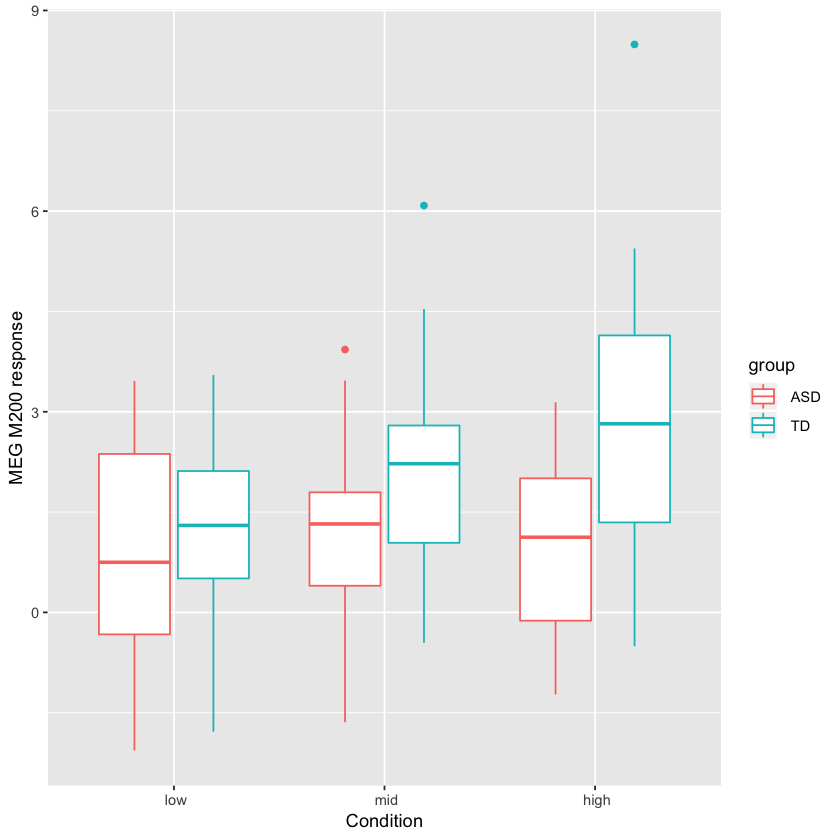

In [6]:
p <- ggplot(aes(x=cond, y=erp, color=group), data=dat) + geom_boxplot()
p + xlab('Condition') + ylab('MEG M200 response')

In [7]:
library(lme4)

Loading required package: Matrix


In [8]:
m <- lmer(erp ~ cond*group + (1|subj), data=dat)

In [9]:
library(car)

Loading required package: carData
Registered S3 methods overwritten by 'car':
  method                          from
  influence.merMod                lme4
  cooks.distance.influence.merMod lme4
  dfbeta.influence.merMod         lme4
  dfbetas.influence.merMod        lme4


In [10]:
Anova(m, test.statistic='F')

,F,Df,Df.res,Pr(>F)
cond,6.376197,2,90,0.002572025
group,9.640717,1,45,0.003288048
cond:group,3.347879,2,90,0.039589390


In [11]:
summary(m)

Linear mixed model fit by REML ['lmerMod']
Formula: erp ~ cond * group + (1 | subj)
   Data: dat

REML criterion at convergence: 505.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.37167 -0.66712 -0.00607  0.58715  2.87699 

Random effects:
 Groups   Name        Variance Std.Dev.
 subj     (Intercept) 0.6733   0.8206  
 Residual             1.6162   1.2713  
Number of obs: 141, groups:  subj, 47

Fixed effects:
                Estimate Std. Error t value
(Intercept)       1.0347     0.2402   4.307
cond.L            0.1144     0.2774   0.412
cond.Q           -0.2146     0.2774  -0.774
group TD          1.0029     0.3230   3.105
cond.L:group TD   0.9585     0.3730   2.570
cond.Q:group TD   0.1137     0.3730   0.305

Correlation of Fixed Effects:
            (Intr) cond.L cond.Q gropTD c.L:TD
cond.L       0.000                            
cond.Q       0.000  0.000                     
group TD    -0.744  0.000  0.000              
cnd.L:grpTD  0.000 -0.744  0.000  0

In [12]:
library(pbkrtest)

In [13]:
m0 = lmer(erp ~ group + cond + (1|subj), data=dat)
KRmodcomp(m, m0)

F-test with Kenward-Roger approximation; computing time: 0.18 sec.
large : erp ~ cond * group + (1 | subj)
small : erp ~ group + cond + (1 | subj)
         stat     ndf     ddf F.scaling p.value  
Ftest  3.3479  2.0000 90.0000         1 0.03959 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### MEMR data

In [14]:
dat <- read.csv('datasets/Mai_et_al_MEMRdata.csv', header=TRUE)

In [15]:
str(dat)

'data.frame':	1660 obs. of  12 variables:
 $ ID    : Factor w/ 166 levels "0186e07548d3bde9",..: 83 123 28 130 107 128 26 141 152 51 ...
 $ Age   : int  23 25 25 23 24 23 23 24 28 28 ...
 $ Gender: Factor w/ 2 levels "F","M": 2 2 1 1 1 1 2 2 1 1 ...
 $ Group : Factor w/ 3 levels "ctrl","ma","nexp": 1 1 1 1 1 1 1 1 1 1 ...
 $ LFA   : num  6.25 5 0 8.75 2.5 5 3.75 0 6.25 8.75 ...
 $ HFA   : num  11.67 6.67 5 18.33 10 ...
 $ EHFA  : num  8.75 0 1.25 1.25 5 ...
 $ Level : int  34 34 34 34 34 34 34 34 34 34 ...
 $ MEMRBB: num  2.09e-03 1.98e-03 5.24e-08 5.43e-04 3.70e-06 ...
 $ MEMRHP: num  2.69e-05 4.25e-05 1.35e-05 9.06e-08 5.71e-05 ...
 $ DPhfa : num  13.62 5.67 -3.94 4.21 2.15 ...
 $ DPehfa: num  -12.5 -25.7 -20.2 -20.2 -32.7 ...


In [16]:
dat$Level <- as.ordered(dat$Level)

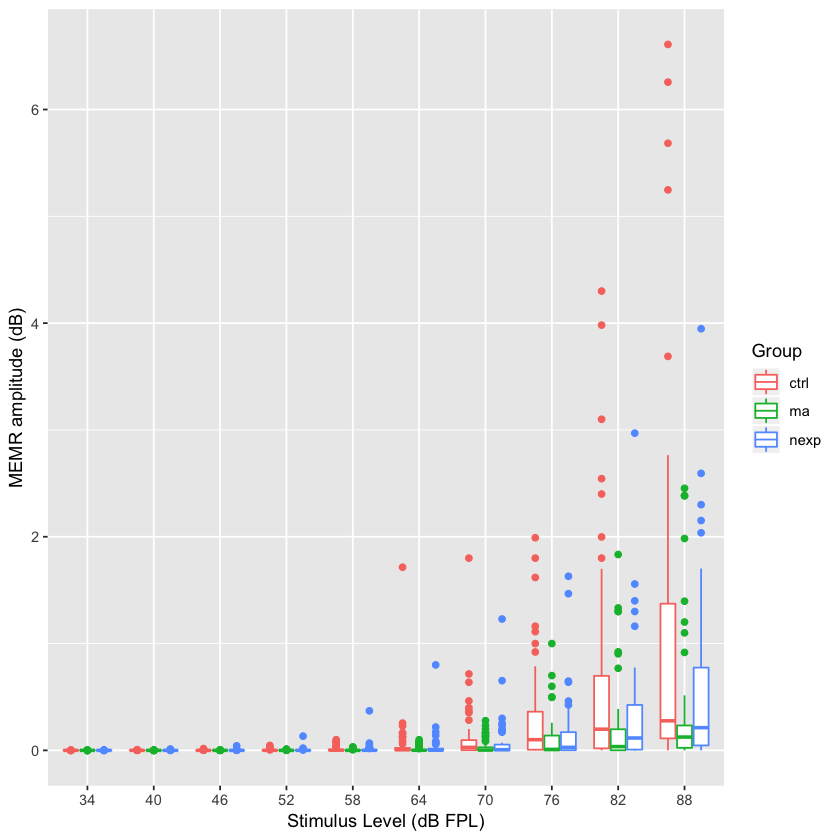

In [17]:
p <- ggplot(aes(x=Level,y=MEMRHP, color=Group), data=dat) + geom_boxplot()
p + xlab('Stimulus Level (dB FPL)') + ylab('MEMR amplitude (dB)')

In [18]:
m <- lmer(MEMRHP ~ LFA + HFA + EHFA + Level*Age + (1|ID), data=dat)
Anova(m, test.statistic='F')

,F,Df,Df.res,Pr(>F)
LFA,5.646053e-01,1,161,4.535076e-01
HFA,2.817302e-01,1,161,5.963008e-01
EHFA,2.695072e-05,1,161,9.958643e-01
Level,5.377880e+01,9,1476,9.053062e-85
Age,2.185244e+00,1,161,1.412927e-01
Level:Age,7.235798e+00,9,1476,2.384609e-10


In [19]:
summary(m)


Correlation matrix not shown by default, as p = 23 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it



Linear mixed model fit by REML ['lmerMod']
Formula: MEMRHP ~ LFA + HFA + EHFA + Level * Age + (1 | ID)
   Data: dat

REML criterion at convergence: 2000.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1643 -0.2556  0.0387  0.1888 12.3486 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.03759  0.1939  
 Residual             0.15680  0.3960  
Number of obs: 1660, groups:  ID, 166

Fixed effects:
              Estimate Std. Error t value
(Intercept)  2.649e-01  6.517e-02   4.064
LFA         -4.409e-03  5.868e-03  -0.751
HFA          2.406e-03  4.532e-03   0.531
EHFA         9.763e-06  1.881e-03   0.005
Level.L      1.027e+00  8.010e-02  12.817
Level.Q      6.899e-01  8.010e-02   8.613
Level.C      2.893e-01  8.010e-02   3.611
Level^4      6.686e-02  8.010e-02   0.835
Level^5     -6.864e-03  8.010e-02  -0.086
Level^6     -2.539e-02  8.010e-02  -0.317
Level^7     -2.255e-02  8.010e-02  -0.282
Level^8     -5.218e-03  8.010e-02  -0.065
Level^

## Aging and time-compressed speech data

In [20]:
dat <- read.csv('datasets/SpeechAge.csv', header=TRUE)

In [21]:
str(dat)

'data.frame':	200 obs. of  5 variables:
 $ score: num  55.1 45.8 66.5 49.1 70.2 ...
 $ id   : int  1 1 1 1 1 1 1 1 2 2 ...
 $ cond : Factor w/ 2 levels "C","I": 2 1 2 1 2 1 2 1 2 1 ...
 $ list : int  3 3 1 1 6 6 2 2 4 4 ...
 $ age  : int  46 46 46 46 46 46 46 46 26 26 ...


In [22]:
dat$id <- as.factor(dat$id)
dat$list <- as.factor(dat$list)

In [23]:
str(dat)

'data.frame':	200 obs. of  5 variables:
 $ score: num  55.1 45.8 66.5 49.1 70.2 ...
 $ id   : Factor w/ 25 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ cond : Factor w/ 2 levels "C","I": 2 1 2 1 2 1 2 1 2 1 ...
 $ list : Factor w/ 6 levels "1","2","3","4",..: 3 3 1 1 6 6 2 2 4 4 ...
 $ age  : int  46 46 46 46 46 46 46 46 26 26 ...


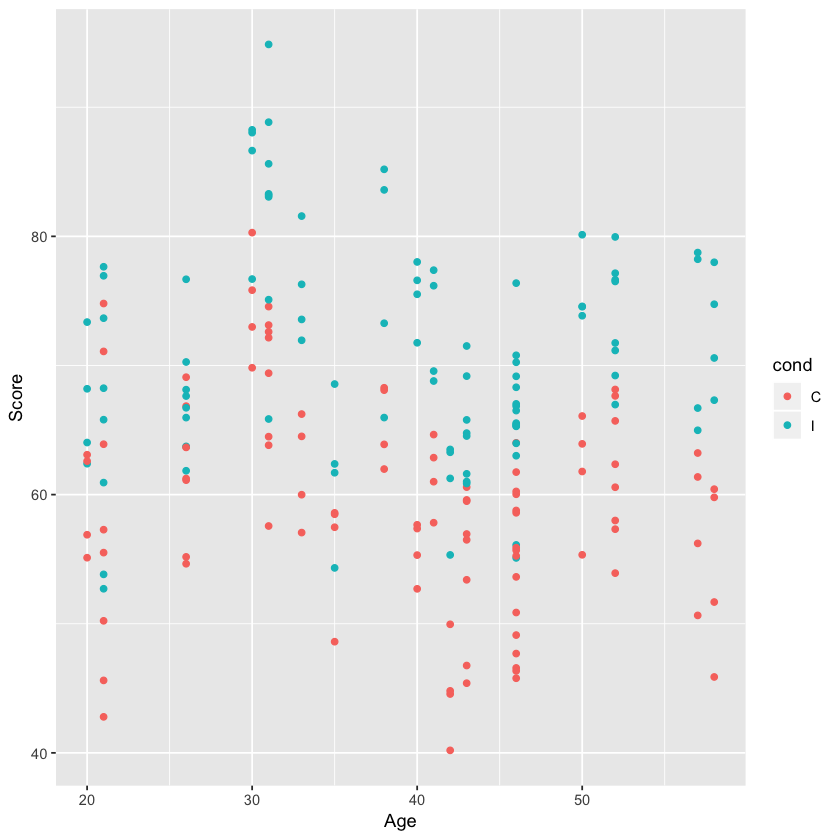

In [24]:
p <- ggplot(aes(x=age,y=score,color=cond), data=dat) + geom_point()
p + xlab('Age') + ylab('Score')

In [25]:
m <- lmer(score ~ age*cond + (1|list) + (1|id), data=dat)

In [26]:
Anova(m, test.statistic='F')

,F,Df,Df.res,Pr(>F)
age,0.6497293,1,22.97586,4.284740e-01
cond,349.1821258,1,168.00544,7.113830e-43
age:cond,10.1396023,1,168.00544,1.729728e-03


In [27]:
dat$agegrp <- factor(dat$age < 40)
levels(dat$agegrp) <- c('MA', 'YNG')

In [28]:
str(dat)

'data.frame':	200 obs. of  6 variables:
 $ score : num  55.1 45.8 66.5 49.1 70.2 ...
 $ id    : Factor w/ 25 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 2 2 ...
 $ cond  : Factor w/ 2 levels "C","I": 2 1 2 1 2 1 2 1 2 1 ...
 $ list  : Factor w/ 6 levels "1","2","3","4",..: 3 3 1 1 6 6 2 2 4 4 ...
 $ age   : int  46 46 46 46 46 46 46 46 26 26 ...
 $ agegrp: Factor w/ 2 levels "MA","YNG": 1 1 1 1 1 1 1 1 2 2 ...


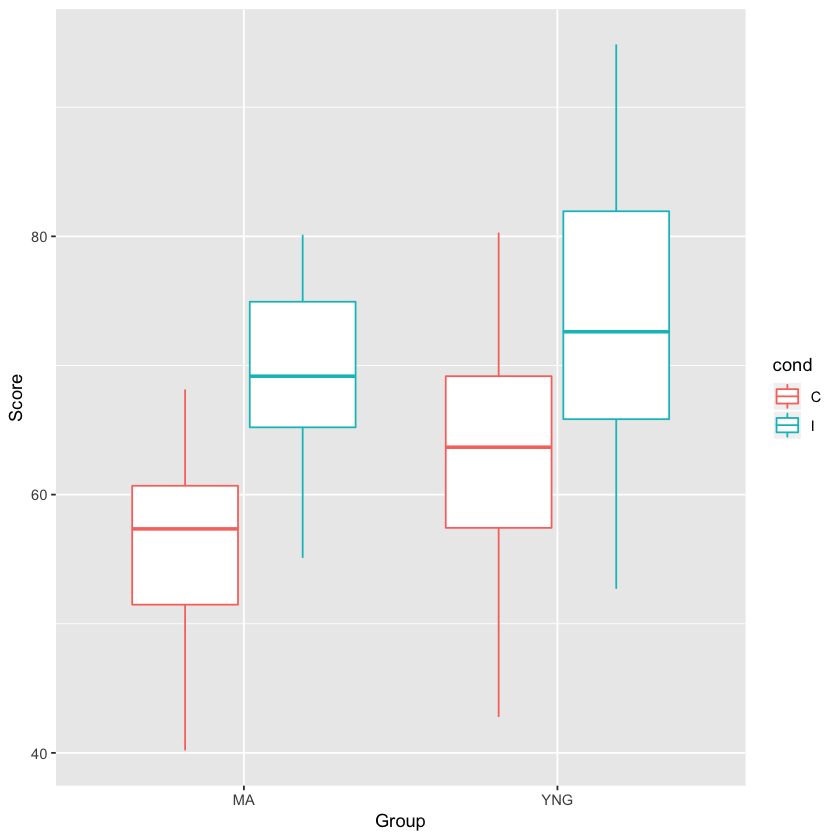

In [29]:
p <- ggplot(aes(x=agegrp,y=score,color=cond),data=dat) + geom_boxplot()
p + xlab('Group') + ylab('Score')